In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("Dataset:")
dataset = pd.read_csv('WaterPotability.csv') #reading the csv
dataset.dropna(inplace=True) #removing rows that is na or dont have value
dataset['Potability'] = dataset['Potability'].astype(int)
print(len(dataset))
print(dataset.head())

Dataset:
318
          ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.68774     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.71654     7.513408  393.663395    283.651634   
7   8.635849  203.361523  13672.09176     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  


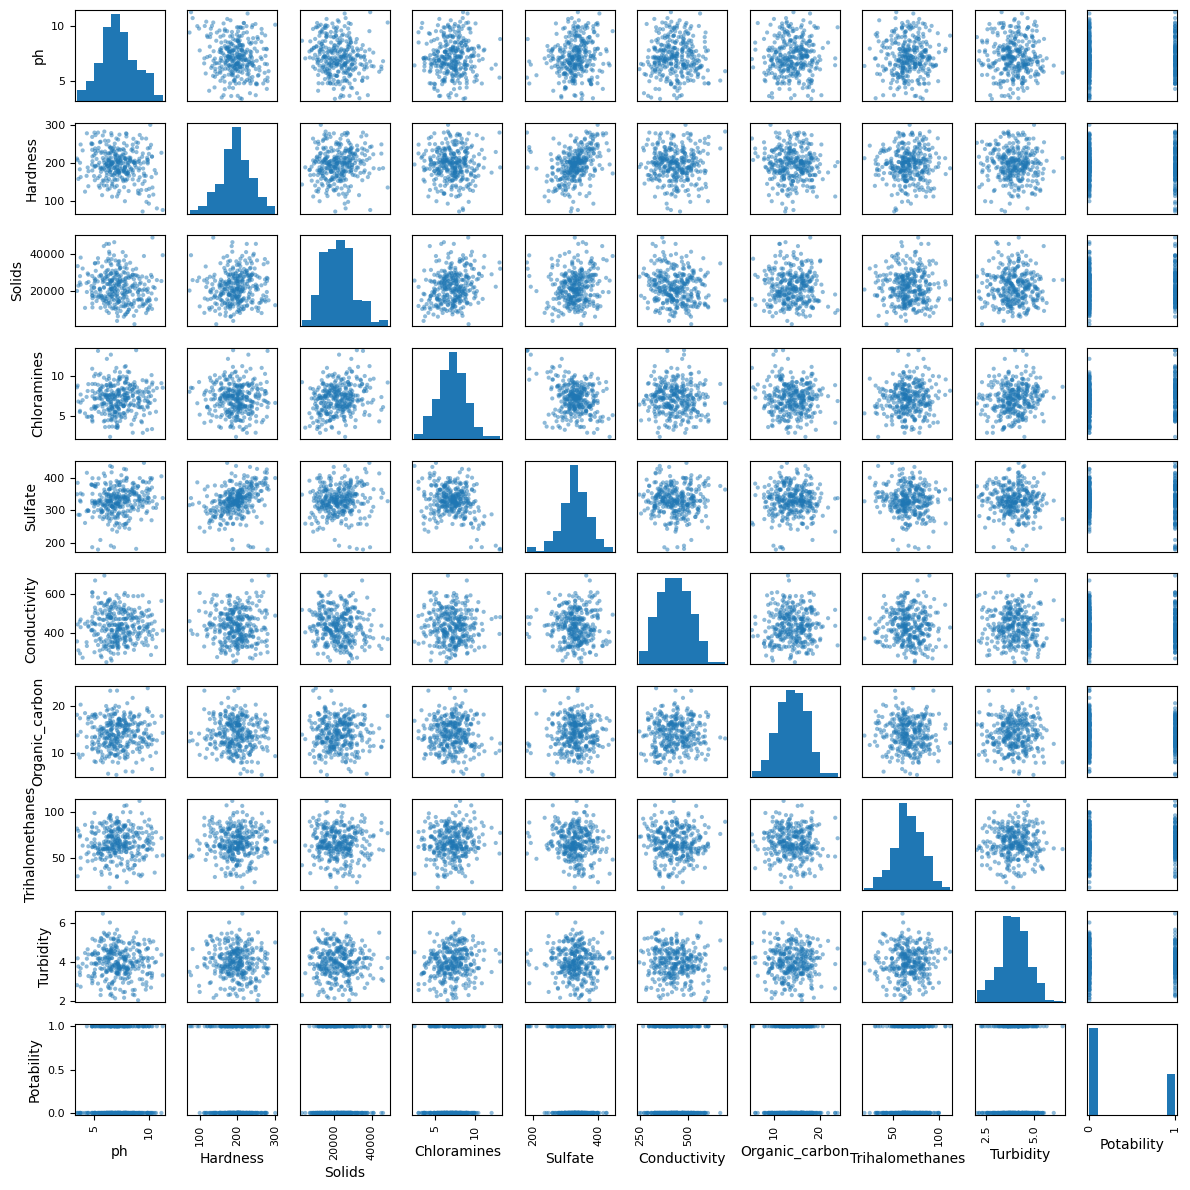

In [2]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

scatter_matrix = pd.plotting.scatter_matrix(dataset[columns], figsize=(12,12)) #for layout

plt.tight_layout()
plt.show()

In [15]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,7.212624,196.222069,22259.464472,7.172648,329.536520,433.337189,14.093790,66.656026,3.977539,0.320755
std,1.599464,40.228013,8262.181373,1.783322,42.727299,81.244755,3.237346,15.927822,0.768696,0.467502
min,3.388091,73.492234,2552.962804,2.484380,180.206746,245.859632,5.315287,17.915723,2.019042,0.000000
25%,6.207579,173.561770,15977.283485,6.052379,307.474693,371.749153,11.854150,57.752446,3.485845,0.000000
50%,7.124625,198.468828,21698.345020,7.226568,329.161171,430.026240,14.060936,66.039945,3.963582,0.000000
75%,8.206774,221.257674,27628.512700,8.279805,355.937080,492.096183,16.416570,78.037097,4.503110,1.000000
max,11.301794,300.292476,48621.563950,13.127000,444.970552,695.369528,23.917601,112.622733,6.494249,1.000000


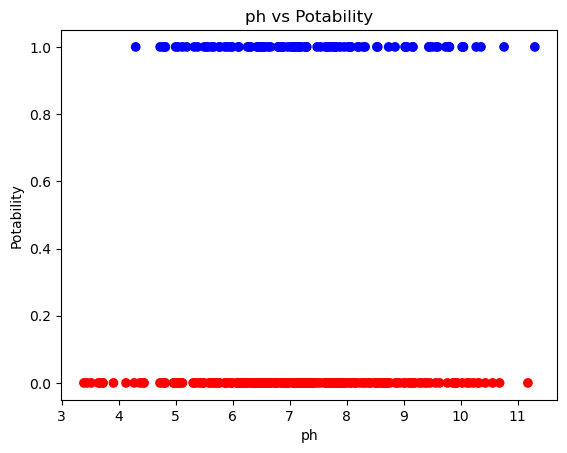

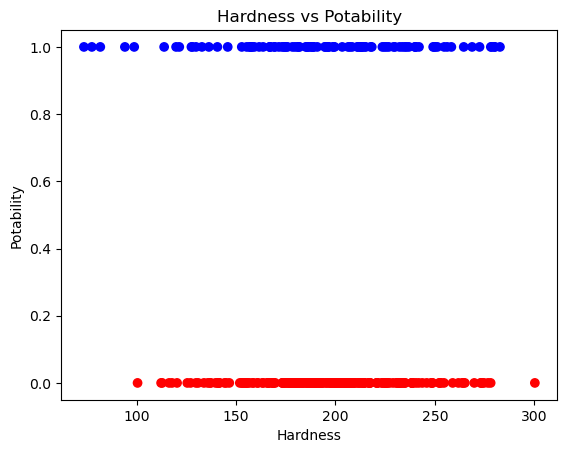

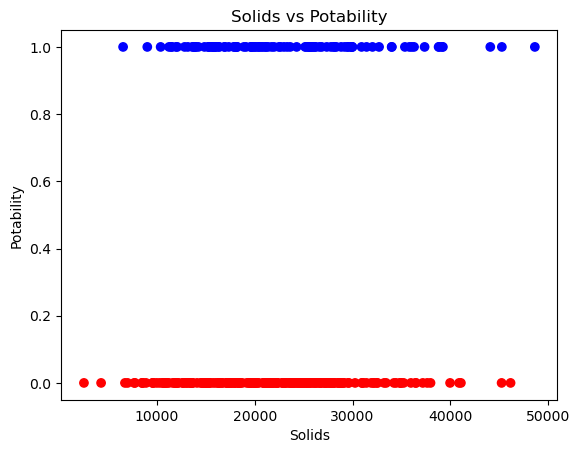

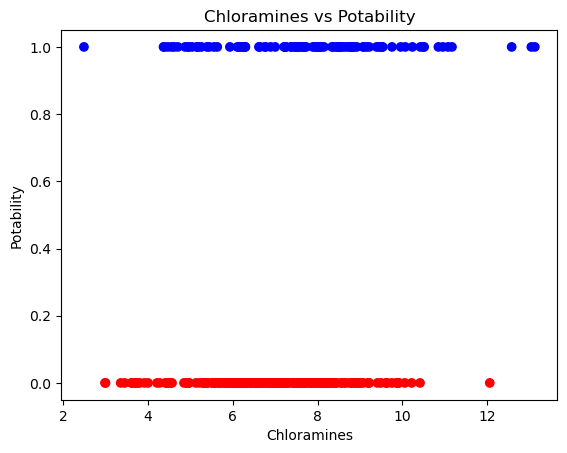

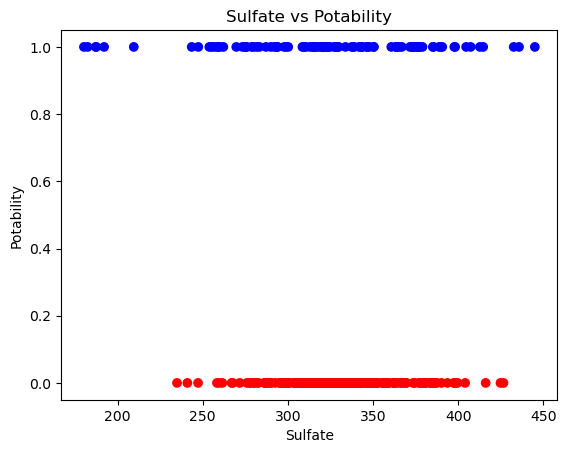

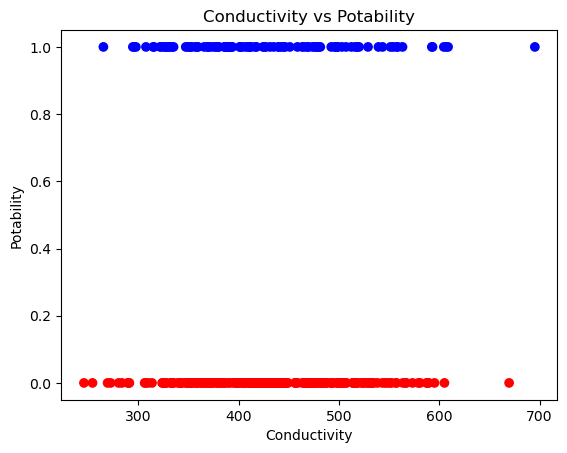

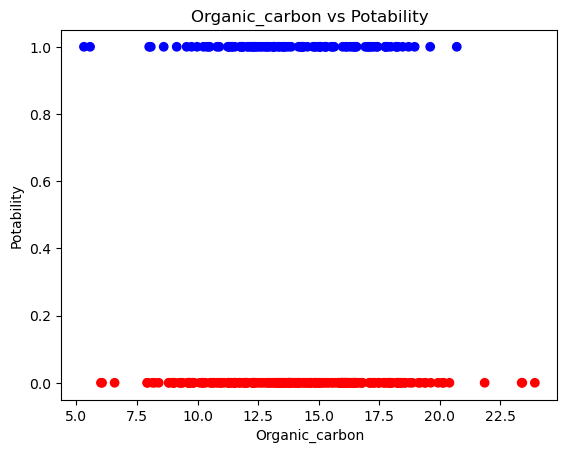

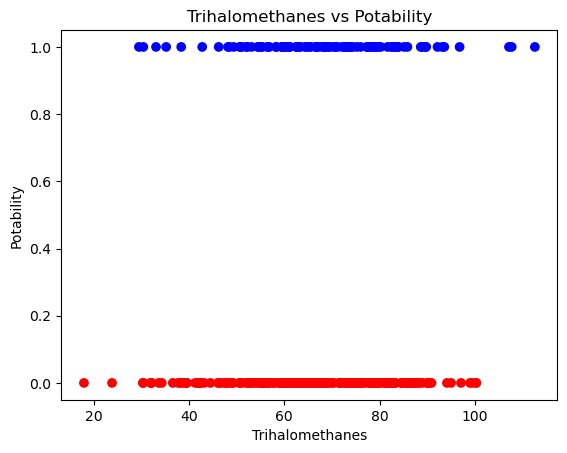

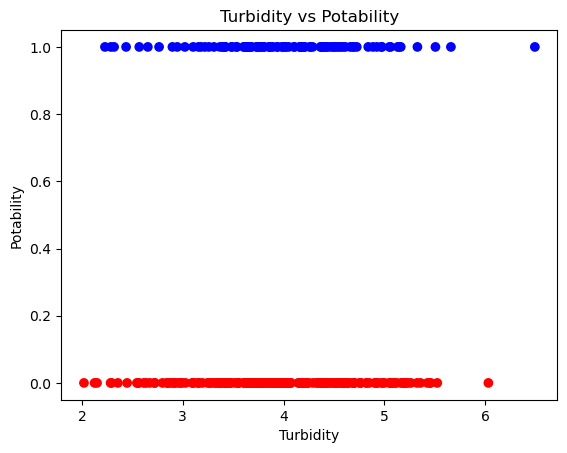

In [16]:
#for comparing of each columns to check for safe water consumption

features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Potability = 'Potability'

colors = {0:'red', 1:'blue'}

for feature in features:
    plt.figure()
    plt.scatter(dataset[feature], dataset[Potability], c=[colors[label] for label in dataset[Potability]])
    plt.xlabel(feature)
    plt.ylabel(Potability)
    plt.title(f'{feature} vs Potability')
    
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

#Class for the model
#training and predicting the data set
class ModelEvaluator:
    def __init__(self, dataset_path, target_column_name, models): # Creating Attributes
        self.dataset_path = dataset_path
        self.target_column_name = target_column_name
        self.dataset = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.label_encoder = None
        self.models = models

#Reading and cleaning the data set, removing the data that don't have values or NA
    def load_dataset(self):
        self.dataset = pd.read_csv(self.dataset_path)
        self.dataset.dropna(inplace=True)
        self.dataset[self.target_column_name] = self.dataset[self.target_column_name].astype(int)

#Function for preparing the dataset for training and testing
    def preprocess_data(self):
        X = self.dataset.drop(columns=[self.target_column_name]) #removing columns except the target column which is the potability
        y = self.dataset[self.target_column_name] #removing the values of the target column in dataset

        self.label_encoder = LabelEncoder() #for converting the string label into numbers
        y_encoded = self.label_encoder.fit_transform(y)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42) #splitting the datasets into training and testing sets

#Function for scaling  the feature on the training and testing set
    def feature_scaling(self):
        sc_X = StandardScaler()
        self.X_train = sc_X.fit_transform(self.X_train)
        self.X_test = sc_X.transform(self.X_test) #.transform is for mean and standard deviation
        
#Function for training and predicting the model
    def train_and_predict(self):
        results = {}
        for model_name, model in self.models.items():
            print(f"**Training and evaluating {model_name}**")
            y_pred = model.fit(self.X_train, self.y_train).predict(self.X_test) #using the current model using the training data set 
            results[model_name] = y_pred
            self.evaluate(model_name, y_pred)
        return results #for other classifier use outside this def or function.

#function for evaluating the performance of the model
    def evaluate(self, model_name, y_pred):
        mse = mean_squared_error(self.y_test, y_pred) #Calculating the mean squared error
        accuracy = accuracy_score(self.y_test, y_pred) #Calculating the accuracy
        f1 = f1_score(self.y_test, y_pred) #Calculating the model's prediction f1_score 
        print(f"{model_name} - Mean Squared Error: {mse}, Accuracy: {accuracy}, F1 Score: {f1}")

#For checking which statement is main and blocking the other statement
if __name__ == "__main__":
    dataset_path = 'WaterPotability.csv'
    target_column_name = 'Potability'

#Creating instances of the models
    knn_classifier = KNeighborsClassifier(n_neighbors=14, p=2, metric='euclidean')
    svm_classifier = SVC(kernel='linear', random_state=0)
    logistic_regression = LogisticRegression(random_state=0)

#Creating the dictionary of models
    models = {
        'KNN Classifier': knn_classifier,
        'SVM Classifier': svm_classifier,
        'Logistic Regression': logistic_regression,}

#Creating ModelEvaluator instance, preprocess data, feature scaling and evaluating models
    evaluator = ModelEvaluator(dataset_path, target_column_name, models)
    evaluator.load_dataset()
    evaluator.preprocess_data()
    evaluator.feature_scaling()

#Train and evaluate all models
    results = evaluator.train_and_predict()

**Training and evaluating KNN Classifier**
KNN Classifier - Mean Squared Error: 0.3125, Accuracy: 0.6875, F1 Score: 0.23076923076923078
**Training and evaluating SVM Classifier**
SVM Classifier - Mean Squared Error: 0.328125, Accuracy: 0.671875, F1 Score: 0.16
**Training and evaluating Logistic Regression**
Logistic Regression - Mean Squared Error: 0.328125, Accuracy: 0.671875, F1 Score: 0.16


/Users/diannelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


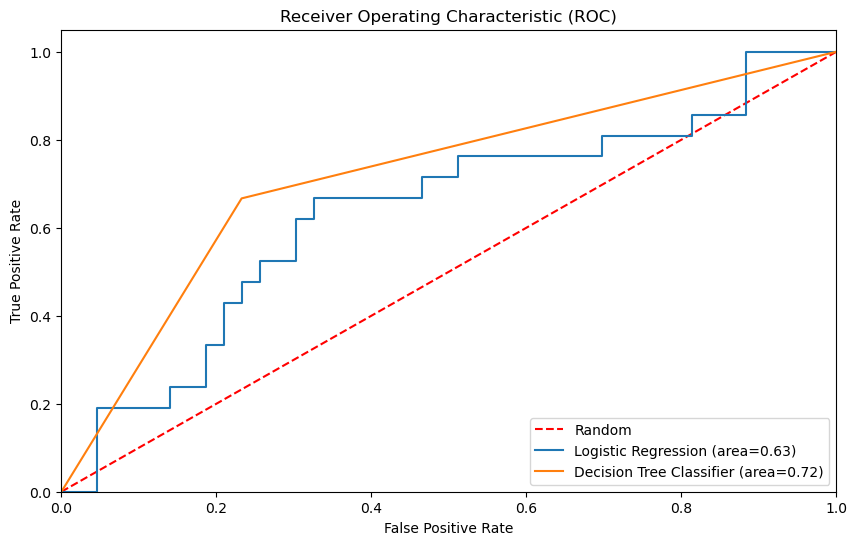

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Creating Class for ROC
class ROCPlotter:
    def __init__(self, X_train, X_test, y_train, y_test): #Creating Attributes
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.classifiers = []

#Function for adding a new classifier to the existing classifier list
    def add_classifier(self, classifier, name):
        self.classifiers.append((classifier, name))

    def plot_roc_curves(self):
        plt.figure(figsize=(10, 6))
        plt.plot([0, 1], [0, 1], 'r--', label='Random')
        
        for classifier, name in self.classifiers: #using for loop for processing the training dataset
            classifier.fit(self.X_train, self.y_train)
            y_scores = classifier.predict_proba(self.X_test)[:, 1] #for predicting the probabilities of positive class
            fpr, tpr, _ = roc_curve(self.y_test, y_scores) #computing the false positive rate
            roc_auc = roc_auc_score(self.y_test, y_scores) #Calculating the AUC ROC
            plt.plot(fpr, tpr, label=f'{name} (area={roc_auc:.2f})')

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc='lower right')
        plt.show()
        
        
#For checking which statement is main and blocking the other statement
if __name__ == '__main__':    #Load and preprocess the dataset
    dataset_path = 'WaterPotability.csv'
    target_column_name = 'Potability'
    dataset = pd.read_csv(dataset_path)
    dataset.dropna(inplace=True)
    dataset['Potability'] = dataset['Potability'].astype(int)
    X = dataset.iloc[:, 0:9]
    y = dataset.iloc[:, 9]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

#Creating ROCPlotter and add a classifiers
    roc_plotter = ROCPlotter(X_train, X_test, y_train, y_test)

#Adding the Logistic Regression
    model_lr = LogisticRegression()
    roc_plotter.add_classifier(model_lr, 'Logistic Regression')

#Creating Decision Tree Classifier
    model_dt = DecisionTreeClassifier()
    roc_plotter.add_classifier(model_dt, 'Decision Tree Classifier')

#Plotting ROC curves for all classifiers
    roc_plotter.plot_roc_curves()
